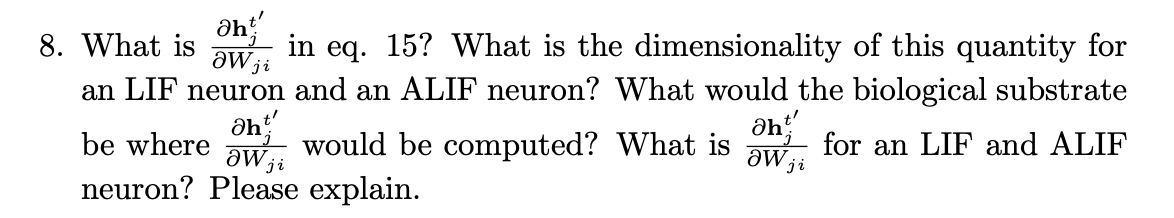

It is the gradient of the hidden state $h_j^{t'}$, which describes how the internal state of neuron j is evolved at each time step, with respect to the weight $W_{ji}$ of the ysnapse from neuron i to neuron j. It depends on each application of W at previous states. 

The hidden state of an ALIF neuron is a 2D vector: $\mathbf{h}_j^t=\left[v_j^t, a_j^t\right]$ (membrane potential and adaptation parameter), therefore the gradient would also be 2D. Whereas, for the LIF we do not have an adaptation parameter, so the hidden state consists only of the membrane potential $v_j^{t}$ and it would be 1D.

Since h is describing the evolution of the internal state of the neuron, computing this gradient will give us the connections among the neurons and how are they going to affect the firing of the other neurons, therefore contributing to their state. This lays on the biological concept of synapse. It is especially relevant for ALIF neurons and other biologically realistic neuron models with slowly changing internal states.

As mentioned above, the gradient for a LIF neuron would be the 1D partial derivative of the mebrane potential of each neuron j at a certain time step, with respect to the weight $W_{ji}$. 

$\frac{\partial v_j^t}{\partial W_{j i}}=z_i^{t-1}$

For an ALIF neuron it would be a 2D vector of the partial derivatives of both the membrane potential and the adaptation parameter, again w.r.t. $W_{ji}$.

$\frac{\partial \mathbf{h}_j^t}{\partial W_{j i}}=\left[\frac{\partial v_j^t}{\partial W_{j i}}, \frac{\partial a_j^t}{\partial W_{j i}}\right]=\left[z_i^{t-1}, 0\right]$

where $z_i^{t-1}$ is the oservable state of neuron j at the previous time step.

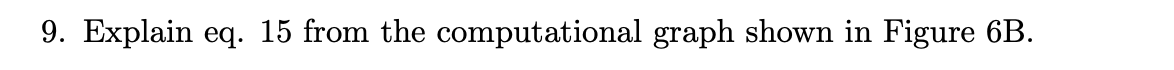

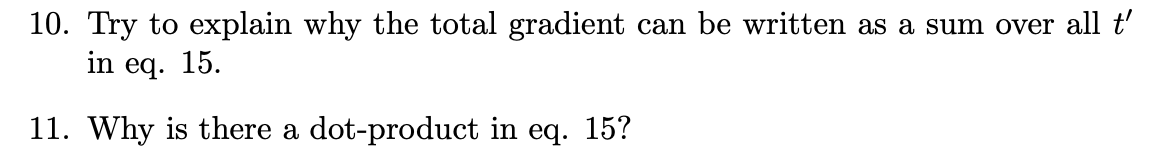

 **Questions 9, 10 and 11 are answered below altogether.**
 
 In eq.15,

 $\frac{d E}{d W_{j i}}=\sum_{t^{\prime}} \frac{d E}{d \mathbf{h}_j^{t^{\prime}}} \cdot \frac{\partial \mathbf{h}_j^{t^{\prime}}}{\partial W_{j i}}$

the gradient of the loss function $E$ with respect to the synaptic weight $W_{j i}$ from neuron i to neuron j is computed. The first factor studies how the loss function is changing w.r.t. the hidden state of the neuron. It needs to take into ccount how the internal state $\mathbf{h}_j$ of neuron j evolves during subsequent time steps and whether it influences firing of j at later time steps. The second term expresses how the hidden state is affected by the synaptic weigths. 

Accroding to the computational graph, at every time step t, we need to take into account past influences: the value of the hidden state (membrane potential) at t-1 $h_j^{t-1}$, and the observable state $z^{t-1}$. 

The classical factorization of the loss gradients in RNNs implies that we are able to unroll the RNN into a large feedforward network, where each layer (l) represents one time step. So for layer (l) the the loss gradients are given by:

$\frac{d E}{d W_{j i}^{(l)}}=\frac{d E}{d h_j^{(l)}} \frac{\partial h_j^{(l)}}{\partial W_{\bar{i}}^{(l)}}$

Since here the wieghts are shared across the layers, when representing a recurrent networks, the summation of these gradients over the layers l yields the sum over all time steps t' that we encounter in eq. (15). Hence, the sum over all t' is to achieve the earlier considerations of time by adding all the contributions of the changes of the two factors mentioned above. 


The dot product is because when we are in ALIF neurons, the h is a 2D vector. So this would be a generalization for both cases of LIF and ALIF neurons.

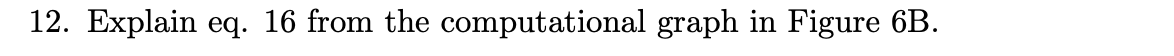

In equation (16):

$\frac{d E}{d \mathbf{h}_j^{t^{\prime}}}=\frac{d E}{d z_j^{t^{\prime}}} \frac{\partial z_j^{t^{\prime}}}{\partial \mathbf{h}_j^{t^{\prime}}}+\frac{d E}{d \mathbf{h}_j^{t^{\prime}+1}} \frac{\partial \mathbf{h}_j^{t^{\prime}+1}}{\partial \mathbf{h}_j^{t^{\prime}}}$

we express $\frac{d E}{d \mathbf{h}_j^{t^{\prime}}}$ recursively as a function of the same derivative at the next time step $\frac{d E}{d \mathbf{h}_j^{t^{\prime}+1}}$ by applying the cahin rule at the node $\mathbf{h}_j^{t}$ for $t = t'$. The ideal learning signals $L_j^t=\frac{d E}{d z_j^t}$ requires to propagate gradients
backward in time, according to the computational graph of figure 6c. Equation (16) serves so that we are able to decompose the term $\frac{d E}{d \mathbf{h}_j^{t^{\prime}}}$ into a series of learning signals $L_j^t=\frac{d E}{d z_j^t}$ and local factors $\frac{\partial \mathbf{h}_j^{t^{\prime}+1}}{\partial \mathbf{h}_j^{t^{\prime}}}$ for $t \geq t^{\prime}$. These will be used to transform the partial derivative $\frac{\partial \mathbf{h}_j^{t^{\prime}}}{\partial W_{j i}}$ of eq. (15) into the eligibility vector $\boldsymbol{\epsilon}_{j i}^t$ that integrates the whole history of the synapse up to time t, not just a single time step.


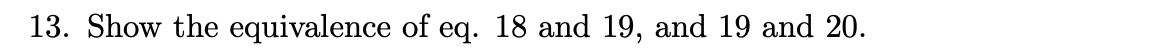

**Answer is in pdf uploaded togehter with the notebook**

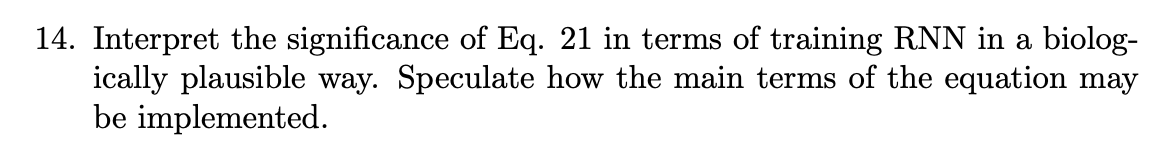

In equation (21):

$\frac{d E}{d W_{j i}}= \sum_t L_j^t \frac{\partial z_j^t}{\partial \mathbf{h}_j^t} \underbrace{\sum_{t^{\prime} \leq t} \frac{\partial \mathbf{h}_j^t}{\partial \mathbf{h}_j^{t-1}} \cdots \frac{\partial \mathbf{h}_j^{t^{\prime}+1}}{\partial \mathbf{h}_j^{t^{\prime}}} \cdot \frac{\partial \mathbf{h}_j^{t^{\prime}}}{\partial W_{j i}}}_{\stackrel{\text { def }}{=} \epsilon_{j i}^t}$

the loss gradient of E is expressed as a sum of learning signals $L_j^t$ multiplied by some factor indexed by ji, which we define as the eligibility trace $e_{j i}^t \in \mathbb{R}$.

$e_{j i}^t \stackrel{\text { def }}{=}\left[\frac{d z_j^t}{d W_{j i}}\right]_{\text {local }} \stackrel{\text { def }}{=} \frac{\partial z_j^t}{\partial \mathbf{h}_j^t} \underbrace{\sum_{t^{\prime} \leq t} \frac{\partial \mathbf{h}_j^t}{\partial \mathbf{h}_j^{t-1}} \cdots \frac{\partial \mathbf{h}_j^{t^{\prime}+1}}{\partial \mathbf{h}_j^{t^{\prime}}}}_{\stackrel{\text { dd }}{=} \epsilon_{j i}^t} \cdot \frac{\partial \mathbf{h}_j^{t^{\prime}}}{\partial W_{j i}}$.

This is significant because we manage to refactorize eq. (15) so that the whole history of the synapse is integrated up to time t, and not just a single time step. The evolution of the internal state of neuron j is pushed into the eligibility trace $e_{ji}$, which collects in e-prop all online computable factors of the loss gradient that just involve neurons j and i.

To implement the main terms of the equation, the eligibility traces need to be derived, through the computation of the partial derivatives:

$\frac{\partial \mathbf{h}_j^t}{\partial \mathbf{h}_j^{t-1}} \cdots \frac{\partial \mathbf{h}_j^{t^{\prime}+1}}{\partial \mathbf{h}_j^{t^{\prime}}}$

as well as the partial derivatives w.r.t. the synaptic weights:

$\frac{\partial \mathbf{h}_j^{t^{\prime}}}{\partial W_{j i}}$

This can be done through the specific values of the hidden variables for both LIF and ALIF neurons, which we are able to know, as mentioned before.
For example, for a LIF neuron, we get:

$\frac{\partial \mathbf{h}_j^{t+1}}{\partial \mathbf{h}_j^t}=\frac{\partial v_j^{t+1}}{\partial v_j^t}=\alpha$ and $\frac{\partial v_j^t}{\partial W_{j i}}=z_i^{t-1}$



